In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ramazanabi/ramazan-abi.csv


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (20,9)
import warnings
warnings.filterwarnings('ignore')

In [20]:
df = pd.read_csv('/kaggle/input/ramazanabi/ramazan-abi.csv')

In [21]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [22]:
df.head()

,Unnamed: 0,Unnamed: 0.1,NORDERID,CUSTOMER_ID,CPOSTCODE,DRECEIEVEDDATE,DRECEIEVEDDATE_YEAR,DRECEIEVEDDATE_MONTH,DRECEIEVEDDATE_DAY,DRECEIEVEDDATE_HOUR,...,ITEMCATEGORY,ORDERITEMQUANTITY,PURCHASEPRICE,POSTALSERVICE,TP_per_Quantity,ST_per_Quantity,UK_CPI,Turkey_CPI,Net_Profit,DayTime
0,0,0,100587,C0000045,NG15 6DA,31.03.2020 00:00,2020,3,31,14,...,Default,1,6.30,Default,13.90,13.90,1.00,14.60,13.90,AfterNoon
1,1,1,101224,C0000046,NG6 8DH,24.04.2020 00:00,2020,4,24,20,...,Default,1,6.30,Default,13.90,13.90,1.00,14.60,13.90,Night
2,2,2,106962,C0000047,PH20 1AP,26.10.2020 00:00,2020,10,26,13,...,Default,2,6.30,Royal Mail Tracked 24,46.75,38.96,1.00,14.60,77.92,AfterNoon
3,3,3,103074,C0000048,RH11 0AN,18.06.2020 00:00,2020,6,18,19,...,Default,1,6.30,Default,15.90,15.90,1.00,14.60,15.90,Night
4,4,4,100690,C0000049,W13 8RG,5.04.2020 00:00,2020,5,4,13,...,Default,1,6.30,2-5 Business Day,31.04,31.04,1.00,14.60,31.04,AfterNoon


In [23]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace =True)

In [24]:
df.head()

,NORDERID,CUSTOMER_ID,CPOSTCODE,DRECEIEVEDDATE,DRECEIEVEDDATE_YEAR,DRECEIEVEDDATE_MONTH,DRECEIEVEDDATE_DAY,DRECEIEVEDDATE_HOUR,DRECEIEVEDDATE_DAY_NAME,DRECEIEVEDDATE_D,...,ITEMCATEGORY,ORDERITEMQUANTITY,PURCHASEPRICE,POSTALSERVICE,TP_per_Quantity,ST_per_Quantity,UK_CPI,Turkey_CPI,Net_Profit,DayTime
0,100587,C0000045,NG15 6DA,31.03.2020 00:00,2020,3,31,14,tuesday,2,...,Default,1,6.30,Default,13.90,13.90,1.00,14.60,13.90,AfterNoon
1,101224,C0000046,NG6 8DH,24.04.2020 00:00,2020,4,24,20,friday,5,...,Default,1,6.30,Default,13.90,13.90,1.00,14.60,13.90,Night
2,106962,C0000047,PH20 1AP,26.10.2020 00:00,2020,10,26,13,monday,1,...,Default,2,6.30,Royal Mail Tracked 24,46.75,38.96,1.00,14.60,77.92,AfterNoon
3,103074,C0000048,RH11 0AN,18.06.2020 00:00,2020,6,18,19,thursday,4,...,Default,1,6.30,Default,15.90,15.90,1.00,14.60,15.90,Night
4,100690,C0000049,W13 8RG,5.04.2020 00:00,2020,5,4,13,monday,1,...,Default,1,6.30,2-5 Business Day,31.04,31.04,1.00,14.60,31.04,AfterNoon


In [25]:
df.shape

(92249, 29)

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NORDERID,92249.00,145917.47,26422.54,100003.00,123111.00,145807.00,168978.00,191881.00
DRECEIEVEDDATE_YEAR,92249.00,2021.52,0.69,2019.00,2021.00,2022.00,2022.00,2022.00
DRECEIEVEDDATE_MONTH,92249.00,6.89,3.36,1.00,4.00,7.00,10.00,12.00
DRECEIEVEDDATE_DAY,92249.00,16.19,8.67,1.00,9.00,16.00,24.00,31.00
DRECEIEVEDDATE_HOUR,92249.00,14.11,4.94,0.00,11.00,14.00,18.00,23.00
DRECEIEVEDDATE_D,92249.00,3.99,2.02,1.00,2.00,4.00,6.00,7.00
SUBTOTAL,92249.00,44.95,33.93,0.00,22.49,35.82,59.90,732.67
TAX,92249.00,8.05,7.80,0.00,3.33,6.24,11.63,636.32
TOTAL,92249.00,53.15,40.31,0.00,26.38,41.18,69.95,879.20
ORDERITEMQUANTITY,92249.00,1.05,0.27,1.00,1.00,1.00,1.00,10.00


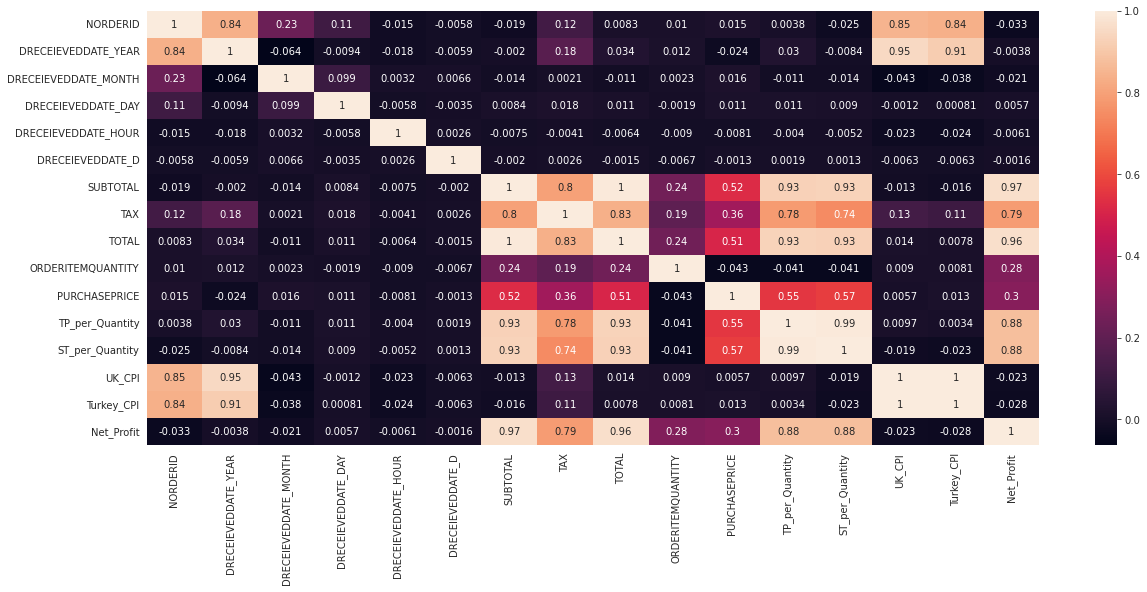

In [35]:
fig,ax = plt.subplots(figsize=(20,8))
sns.heatmap(df.corr(),annot=True);

In [28]:
df.groupby('CUSTOMER_ID')['SUBTOTAL'].sum()

CUSTOMER_ID
C0000001   2275553.26
C0000002        83.00
C0000003        15.90
C0000004        15.90
C0000005        13.90
              ...    
C0032495        58.29
C0032496       116.58
C0032497        93.27
C0032498        58.29
UNKNOWN         60.78
Name: SUBTOTAL, Length: 31662, dtype: float64

In [29]:
df2 = df[df['CUSTOMER_ID'] != 'C0000001']

In [30]:
df2.head()

,NORDERID,CUSTOMER_ID,CPOSTCODE,DRECEIEVEDDATE,DRECEIEVEDDATE_YEAR,DRECEIEVEDDATE_MONTH,DRECEIEVEDDATE_DAY,DRECEIEVEDDATE_HOUR,DRECEIEVEDDATE_DAY_NAME,DRECEIEVEDDATE_D,...,ITEMCATEGORY,ORDERITEMQUANTITY,PURCHASEPRICE,POSTALSERVICE,TP_per_Quantity,ST_per_Quantity,UK_CPI,Turkey_CPI,Net_Profit,DayTime
0,100587,C0000045,NG15 6DA,31.03.2020 00:00,2020,3,31,14,tuesday,2,...,Default,1,6.30,Default,13.90,13.90,1.00,14.60,13.90,AfterNoon
1,101224,C0000046,NG6 8DH,24.04.2020 00:00,2020,4,24,20,friday,5,...,Default,1,6.30,Default,13.90,13.90,1.00,14.60,13.90,Night
2,106962,C0000047,PH20 1AP,26.10.2020 00:00,2020,10,26,13,monday,1,...,Default,2,6.30,Royal Mail Tracked 24,46.75,38.96,1.00,14.60,77.92,AfterNoon
3,103074,C0000048,RH11 0AN,18.06.2020 00:00,2020,6,18,19,thursday,4,...,Default,1,6.30,Default,15.90,15.90,1.00,14.60,15.90,Night
4,100690,C0000049,W13 8RG,5.04.2020 00:00,2020,5,4,13,monday,1,...,Default,1,6.30,2-5 Business Day,31.04,31.04,1.00,14.60,31.04,AfterNoon


In [31]:
df2.shape

(37577, 29)

In [32]:
df2.groupby('CUSTOMER_ID')['SUBTOTAL'].sum()

CUSTOMER_ID
C0000002    83.00
C0000003    15.90
C0000004    15.90
C0000005    13.90
C0000006    13.52
            ...  
C0032495    58.29
C0032496   116.58
C0032497    93.27
C0032498    58.29
UNKNOWN     60.78
Name: SUBTOTAL, Length: 31661, dtype: float64

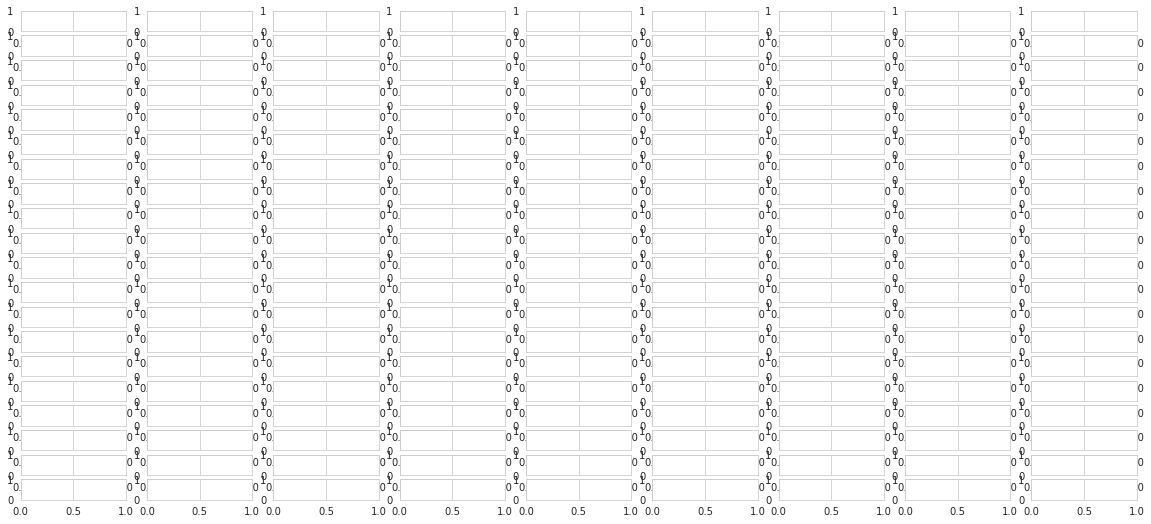

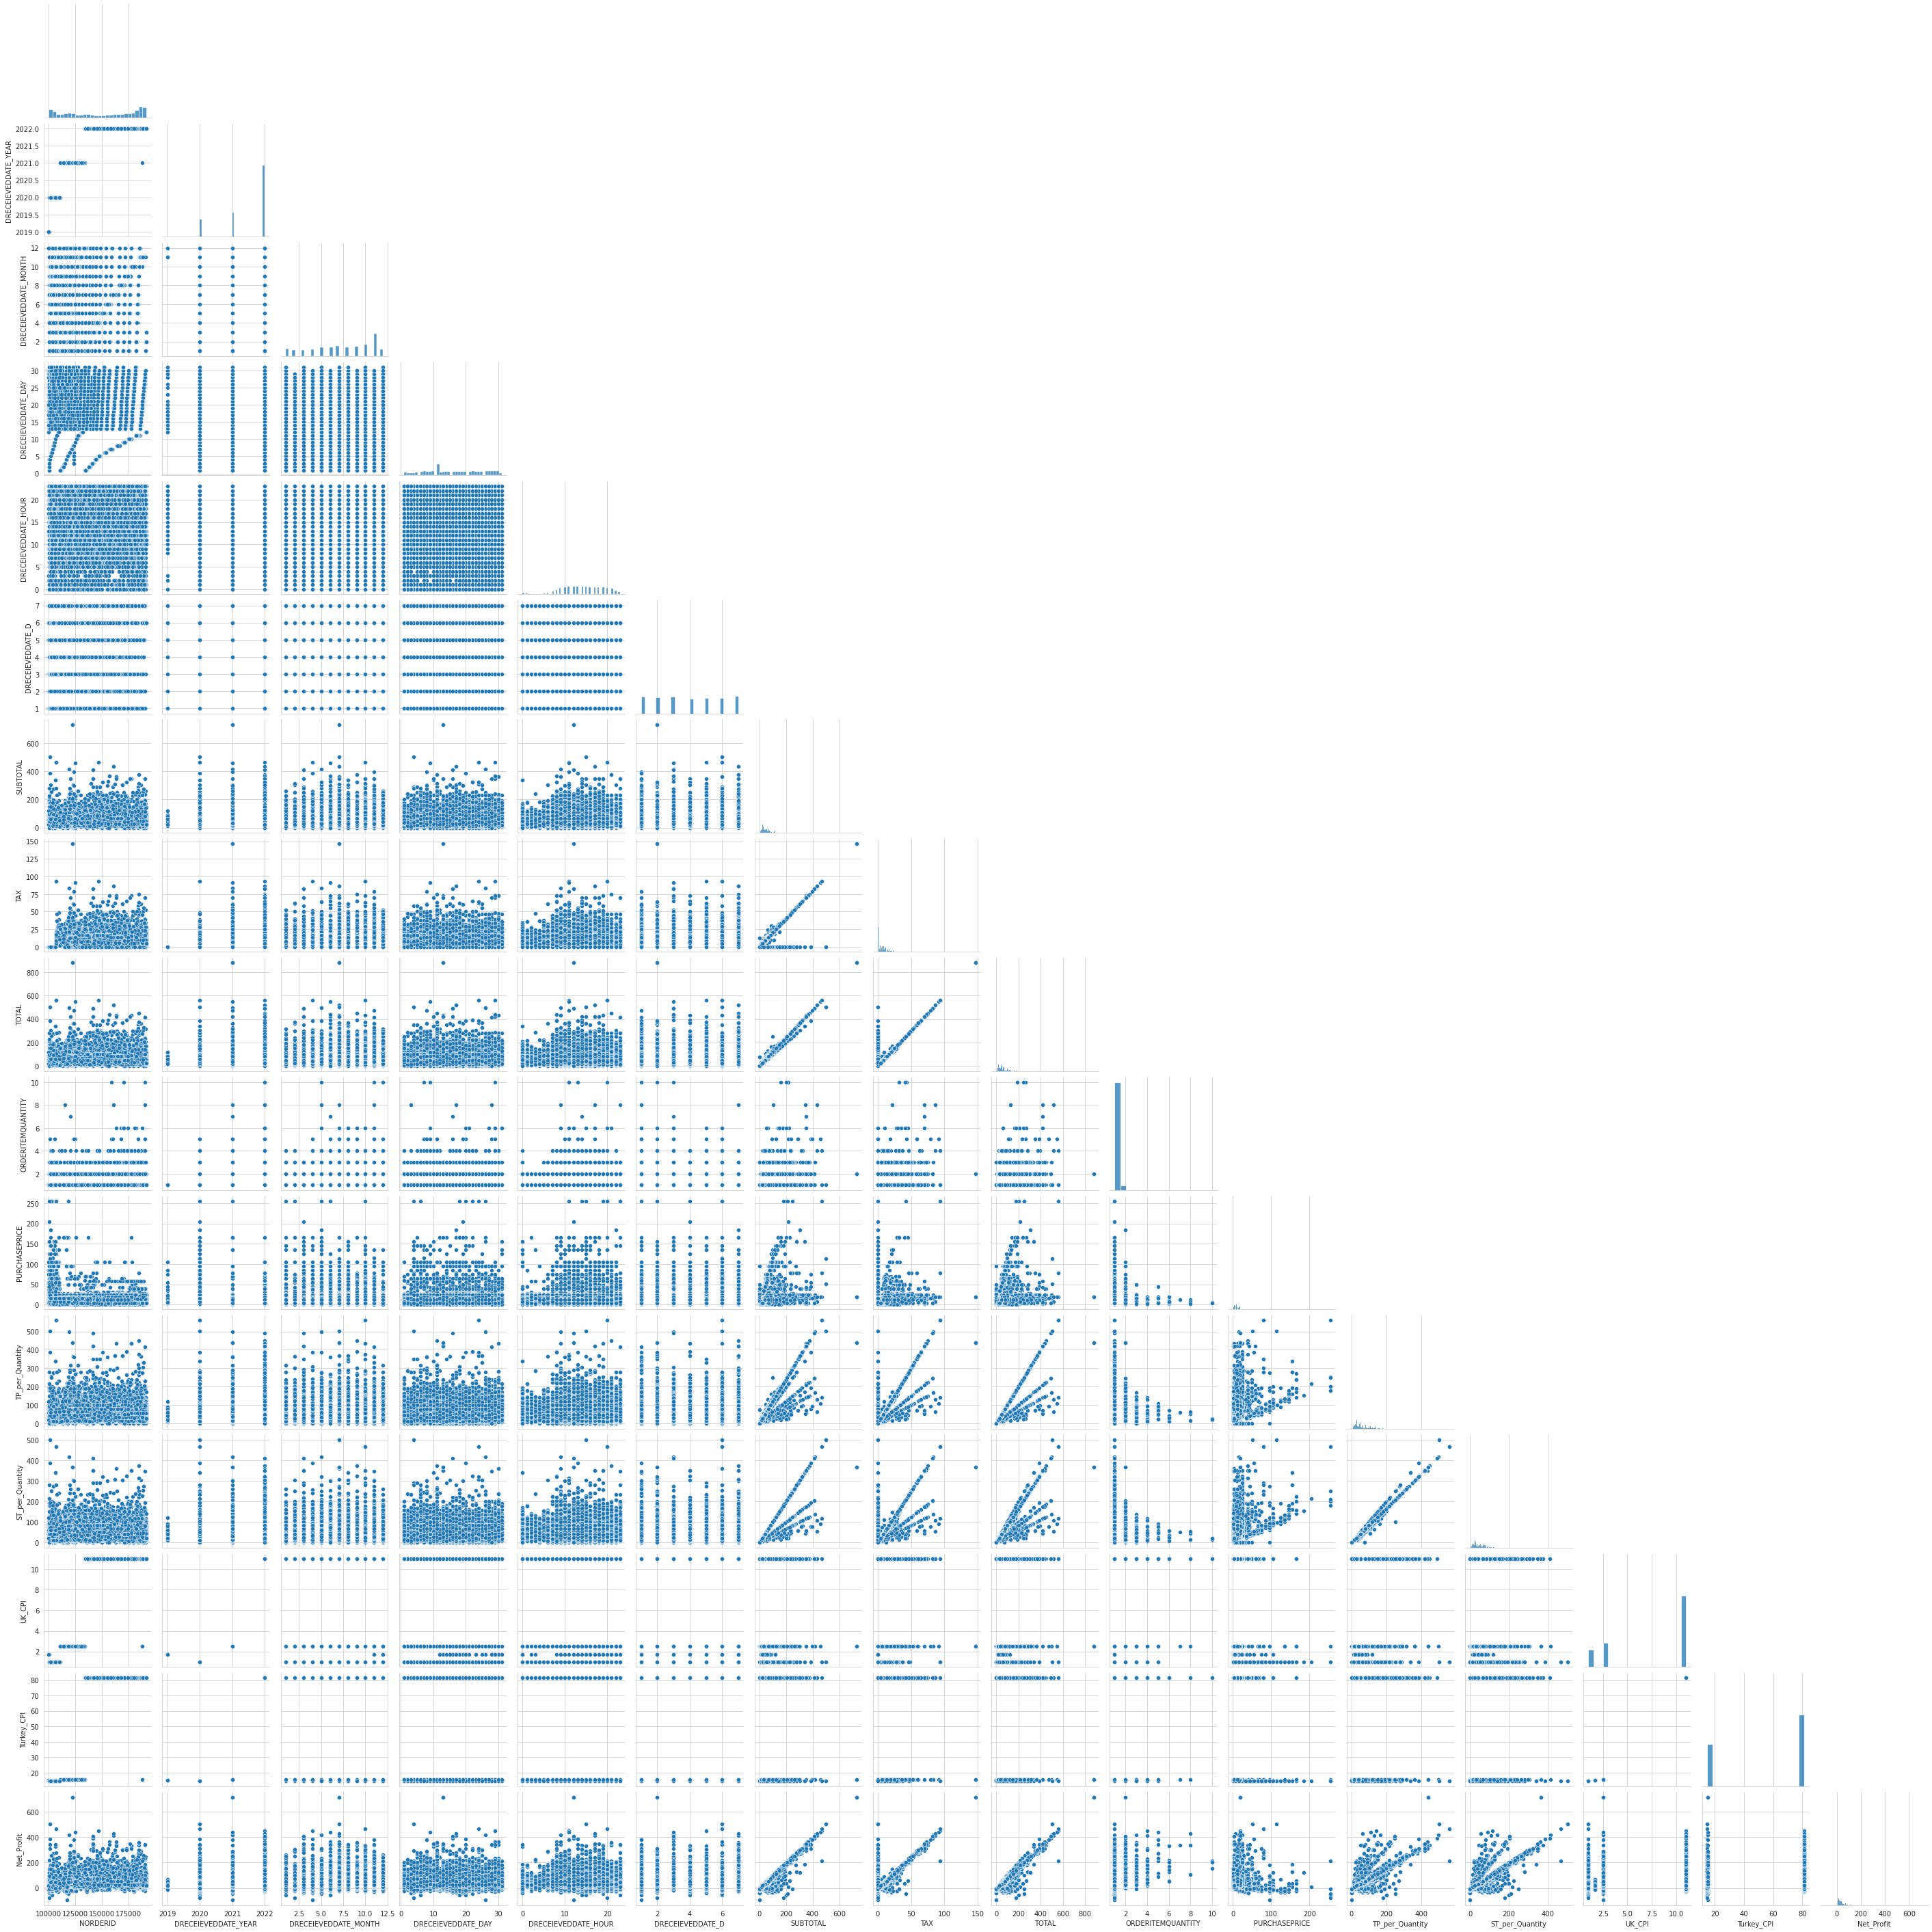

In [36]:
fig,ax = plt.subplots(20,9)
sns.pairplot(data=df2,corner=True);

## Clustering with df2

In [37]:
df2.set_index('CUSTOMER_ID',inplace=True)

In [40]:
df_subtotal = df2[['SUBTOTAL','TAX']]

In [41]:
df_subtotal.head()

,SUBTOTAL,TAX
CUSTOMER_ID,,
C0000045,13.90,0.00
C0000046,13.90,0.00
C0000047,77.92,15.58
C0000048,15.90,0.00
C0000049,31.04,0.00


In [42]:
X = df_subtotal.drop('TAX',axis=1)

In [43]:
from sklearn.cluster import KMeans
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

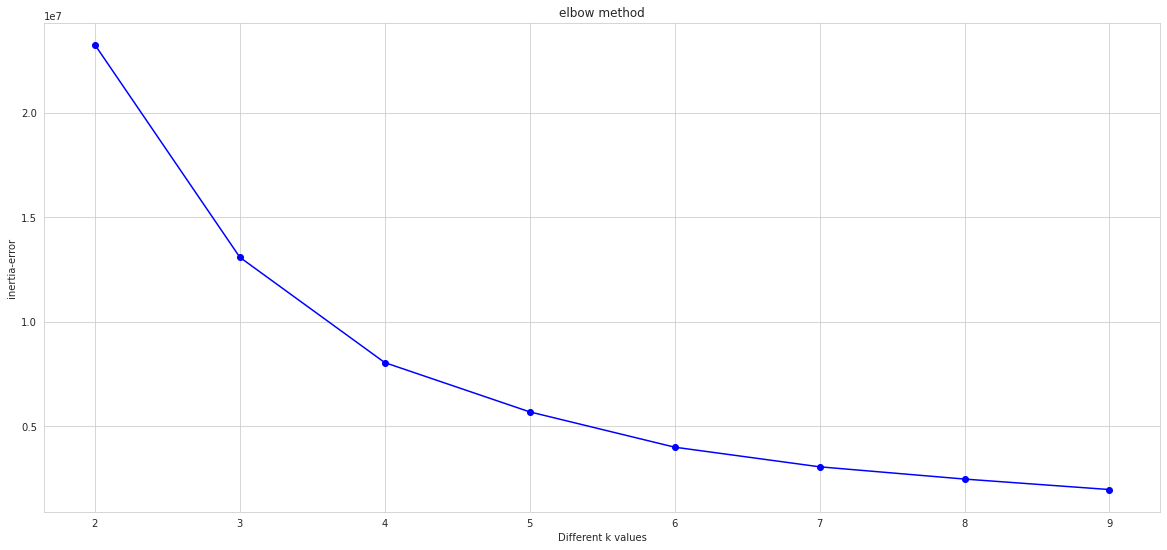

In [44]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 
plt.show()

In [45]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6514530064990057
For n_clusters=3, the silhouette score is 0.6291246626426709
For n_clusters=4, the silhouette score is 0.6086138139066313
For n_clusters=5, the silhouette score is 0.56942727329424
For n_clusters=6, the silhouette score is 0.5712234174961843
For n_clusters=7, the silhouette score is 0.5549318769172682
For n_clusters=8, the silhouette score is 0.5541732077811117


## K-Means 

In [46]:
from sklearn.cluster import KMeans

K_means_model = KMeans(n_clusters=4, random_state=42)
K_means_model.fit_predict(X)

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [47]:
K_means_model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [48]:
K_means_model.labels_

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [49]:
X["Classes"] = K_means_model.labels_

In [50]:
X.head()

,SUBTOTAL,Classes
CUSTOMER_ID,,
C0000045,13.90,0
C0000046,13.90,0
C0000047,77.92,1
C0000048,15.90,0
C0000049,31.04,0


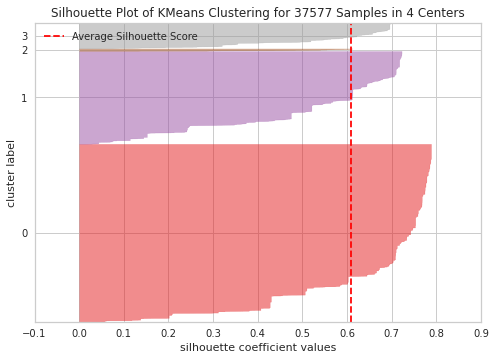

In [51]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

In [52]:
clusters = model.labels_

In [53]:
X["predicted_clusters"] = clusters

In [54]:
X.head()

,SUBTOTAL,Classes,predicted_clusters
CUSTOMER_ID,,,
C0000045,13.90,0,0
C0000046,13.90,0,0
C0000047,77.92,1,1
C0000048,15.90,0,0
C0000049,31.04,0,0


In [55]:
model.labels_

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [56]:
df_subtotal['predicted_clusters']  = clusters

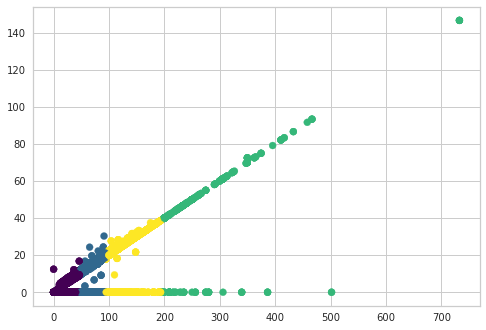

In [57]:
plt.scatter(df_subtotal["SUBTOTAL"],df_subtotal['TAX'],c = df_subtotal.predicted_clusters,cmap='viridis');